### This dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

1) Build a deep learning model to predict churn rate at bank. 

2) Once model is built, print classification report and analyze precision, recall and f1-score 

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
unwanted_cols = ['RowNumber', 'CustomerId', 'Surname']

In [7]:
df.drop(columns=unwanted_cols, inplace=True)

In [8]:
df.shape

(10000, 11)

In [9]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
#Binary categories
binary_cols = ["Gender"]
df['Gender'] = df['Gender'].replace({'Male':1, 'Female':0})

C:\Users\Admin\AppData\Local\Temp\ipykernel_24676\932378532.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male':1, 'Female':0})


In [11]:
df1 = df.copy()

In [12]:
for c in df1.columns:
    print(f"{c}\n{df1[c].dtype}")
    print(df1[c].unique())

CreditScore
int64
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 

In [13]:
#one hot encoding
encoded_cols = ['Geography', 'NumOfProducts']
df1 = pd.get_dummies(df1, columns=encoded_cols, dtype=int)

In [14]:
#scalling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_cols = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]

df1[scale_cols] = scaler.fit_transform(df1[scale_cols])


In [15]:
#drop rows where balane is 0.0
df1.drop(df1[df1['Balance'] == 0].index, inplace=True)

In [16]:
df1.head(10)

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
1,0.516,0,0.310811,0.1,0.334031,0,1,0.562709,0,0,0,1,1,0,0,0
2,0.304,0,0.324324,0.8,0.636357,1,0,0.569654,1,1,0,0,0,0,1,0
4,1.000,0,0.337838,0.2,0.500246,1,1,0.395400,0,0,0,1,1,0,0,0
5,0.590,1,0.351351,0.8,0.453394,1,0,0.748797,1,0,0,1,0,1,0,0
7,0.052,0,0.148649,0.4,0.458540,1,0,0.596733,1,0,1,0,0,0,0,1
8,0.302,1,0.351351,0.4,0.566170,0,1,0.374680,0,1,0,0,0,1,0,0
9,0.668,1,0.121622,0.2,0.536488,1,1,0.358605,0,1,0,0,1,0,0,0
10,0.356,1,0.175676,0.6,0.406606,0,0,0.400886,0,1,0,0,0,1,0,0
15,0.532,1,0.364865,0.3,0.570468,0,1,0.321609,0,0,1,0,0,1,0,0
16,0.606,1,0.540541,0.1,0.528513,1,0,0.025433,1,0,1,0,1,0,0,0


In [17]:
df1.shape

(6383, 16)

## Train-test split

In [19]:
X = df1.drop(columns='Exited')
y = df1['Exited']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [21]:
X_test.shape

(2107, 15)

In [22]:
# Model
import tensorflow as tf
from tensorflow import keras

In [52]:
model = keras.Sequential([
    keras.layers.Dense(500, input_shape=(15,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )
model.fit(X_train, y_train, epochs=140)

Epoch 1/140


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7905 - loss: 0.4653
Epoch 2/140
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8155 - loss: 0.4253
Epoch 3/140
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8213 - loss: 0.4179
Epoch 4/140
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8237 - loss: 0.4079
Epoch 5/140
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8267 - loss: 0.4055
Epoch 6/140
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8328 - loss: 0.3999
Epoch 7/140
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8316 - loss: 0.4028
Epoch 8/140
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8365 - loss: 0.3969
Epoch 9/140
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8384 - loss: 0.3944
Epoch 10/140
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8368 - loss: 0.3910
Epoch 11/140
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8351 - loss: 0.3909
Epoch 12/140
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [54]:
model.evaluate(X_test, y_test)

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7912 - loss: 0.8649


[0.8648810386657715, 0.7911722660064697]

In [56]:
y_prediction = model.predict(X_test)


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [68]:
y_test[:10]

1783    0
7988    0
8863    1
2046    0
7757    0
6360    0
4939    1
8390    1
6690    0
7113    0
Name: Exited, dtype: int64

In [72]:
y_pred = []
for i in y_prediction:
    if i >0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [84]:
len(y_test)

2107

In [80]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

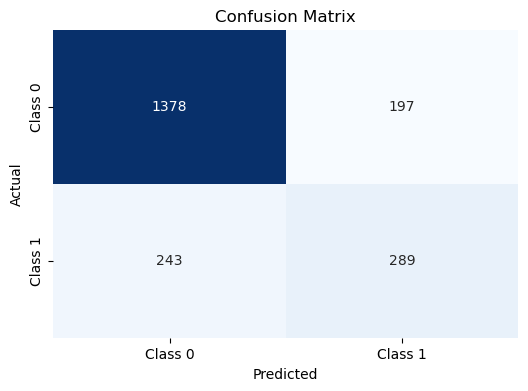

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
class_names = ['Class 0', 'Class 1']

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [92]:
print(report)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1575
           1       0.59      0.54      0.57       532

    accuracy                           0.79      2107
   macro avg       0.72      0.71      0.72      2107
weighted avg       0.79      0.79      0.79      2107



Accuracy: 0.8115804461319411
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      1575
           1       0.80      0.34      0.48       532

    accuracy                           0.81      2107
   macro avg       0.81      0.65      0.68      2107
weighted avg       0.81      0.81      0.78      2107



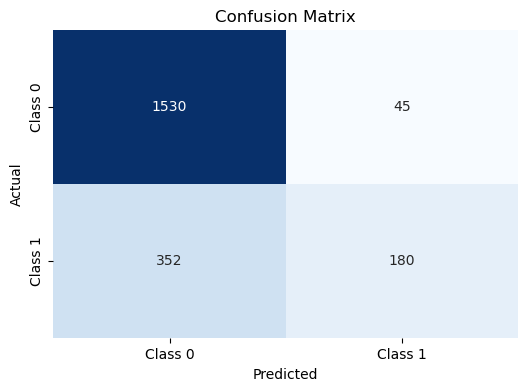

In [98]:
## Trying with LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train model
model1 = LogisticRegression()
model1.fit(X_train, y_train)

# Predict
y_pred1 = model1.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred1))
print(classification_report(y_test, y_pred1))


cm1 = confusion_matrix(y_test, y_pred1)
class_names = ['Class 0', 'Class 1']

plt.figure(figsize=(6,4))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8158519221642145
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1575
           1       0.80      0.36      0.50       532

    accuracy                           0.82      2107
   macro avg       0.81      0.67      0.69      2107
weighted avg       0.81      0.82      0.79      2107



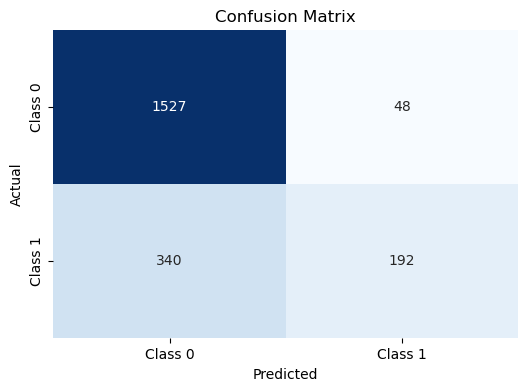

In [112]:
## DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

cm2 = confusion_matrix(y_test, y_pred2)
class_names = ['Class 0', 'Class 1']

plt.figure(figsize=(6,4))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [126]:
from sklearn.ensemble import GradientBoostingClassifier

model3 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred3))


Accuracy: 0.8243948742287612


In [122]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7816801139060275


In [132]:
from sklearn.neighbors import KNeighborsClassifier

model4 = KNeighborsClassifier(n_neighbors=5)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred4))


Accuracy: 0.7840531561461794


In [134]:
from sklearn.svm import SVC

model5 = SVC(kernel='rbf', C=1.0)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred5))


Accuracy: 0.8054105363075462


In [136]:
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier(n_estimators=100, random_state=42)
model6.fit(X_train, y_train)
y_pred6 = model6.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred6))


Accuracy: 0.8277171333649739


In [138]:
!pip install xgboost

  Using cached xgboost-3.1.0-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   -----------------

In [140]:
# pip install xgboost
from xgboost import XGBClassifier

model7 = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model7.fit(X_train, y_train)
y_pred7 = model7.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred7))


Accuracy: 0.8262933080208827
